## Tag along codes for the quize on pattern recognition using Africa Food Production and Supply datasets

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline
import datetime as dt
import plotly.graph_objects as go

In [2]:
# Food production dataset
food_prod = pd.read_csv('Africa Food Production (2004 - 2013).csv')
food_prod.head(3)

,Country,Item,Year,Value
0,Algeria,Wheat and products,2004,2731
1,Algeria,Wheat and products,2005,2415
2,Algeria,Wheat and products,2006,2688


In [3]:
#food supply dataset
food_supply = pd.read_csv("Africa Food Supply (2004 - 2013).csv")
food_supply.head(3)

,Country,Year,Value
0,Algeria,2004,2987
1,Algeria,2005,2958
2,Algeria,2006,3047


In [4]:
# coverting the year columns into datetime 
food_prod['Year'] = food_prod['Year'].apply(lambda x: pd.to_datetime(str(x), format='%Y'))
food_supply['Year'] = food_supply['Year'].apply(lambda x: pd.to_datetime(str(x), format='%Y')) 

#creating a new column with kt representing the unit of values in kilotones
food_prod['Unit'] = 'kt'
food_prod.head(3)

,Country,Item,Year,Value,Unit
0,Algeria,Wheat and products,2004-01-01,2731,kt
1,Algeria,Wheat and products,2005-01-01,2415,kt
2,Algeria,Wheat and products,2006-01-01,2688,kt


In [5]:
#creating a column unit representing the unit of values in kilotones
food_supply['Unit'] = 'kt'
food_supply.head(3)

,Country,Year,Value,Unit
0,Algeria,2004-01-01,2987,kt
1,Algeria,2005-01-01,2958,kt
2,Algeria,2006-01-01,3047,kt


In [6]:
#average food production for each year
food_production_avg=pd.DataFrame(food_prod.groupby('Year')['Value'].mean()).reset_index(inplace= False)
food_production_avg

,Year,Value
0,2004-01-01,286.767301
1,2005-01-01,298.986592
2,2006-01-01,310.814014
3,2007-01-01,305.215830
4,2008-01-01,318.686851
5,2009-01-01,323.040657
6,2010-01-01,340.166955
7,2011-01-01,351.303633
8,2012-01-01,364.831816
9,2013-01-01,378.227568


In [7]:
#average food supply for each year
food_supply_avg=pd.DataFrame(food_supply.groupby('Year')['Value'].mean()).reset_index(inplace= False)
food_supply_avg

,Year,Value
0,2004-01-01,2394.222222
1,2005-01-01,2409.288889
2,2006-01-01,2430.800000
3,2007-01-01,2447.755556
4,2008-01-01,2460.755556
5,2009-01-01,2482.222222
6,2010-01-01,2497.400000
7,2011-01-01,2515.422222
8,2012-01-01,2527.644444
9,2013-01-01,2532.244444


In [8]:
# Grouping by year and item to calculate the yearly mean values of all items produced, where mv = mean value of each item
item_prod =food_prod.groupby(['Year','Item'])['Value'].mean().reset_index()
item_prod = pd.DataFrame(item_prod) 
item_prod

,Year,Item,Value
0,2004-01-01,"Alcohol, Non-Food",37.000000
1,2004-01-01,Apples and products,253.000000
2,2004-01-01,"Aquatic Animals, Others",0.062500
3,2004-01-01,Aquatic Plants,9.750000
4,2004-01-01,Bananas,368.787879
...,...,...,...
935,2013-01-01,Tomatoes and products,499.444444
936,2013-01-01,"Vegetables, Other",1027.622222
937,2013-01-01,Wheat and products,1038.370370
938,2013-01-01,Wine,154.250000


### Qestion 1. What three Countries produced the higest total quantities of fice from 2004 - 2013

In [9]:
mv = item_prod.loc[item_prod.Item== 'Rice (Milled Equivalent)']
mv

,Year,Item,Value
71,2004-01-01,Rice (Milled Equivalent),326.789474
165,2005-01-01,Rice (Milled Equivalent),348.763158
259,2006-01-01,Rice (Milled Equivalent),379.026316
353,2007-01-01,Rice (Milled Equivalent),361.500000
447,2008-01-01,Rice (Milled Equivalent),420.289474
541,2009-01-01,Rice (Milled Equivalent),405.842105
635,2010-01-01,Rice (Milled Equivalent),457.315789
729,2011-01-01,Rice (Milled Equivalent),454.157895
823,2012-01-01,Rice (Milled Equivalent),482.394737
917,2013-01-01,Rice (Milled Equivalent),489.578947


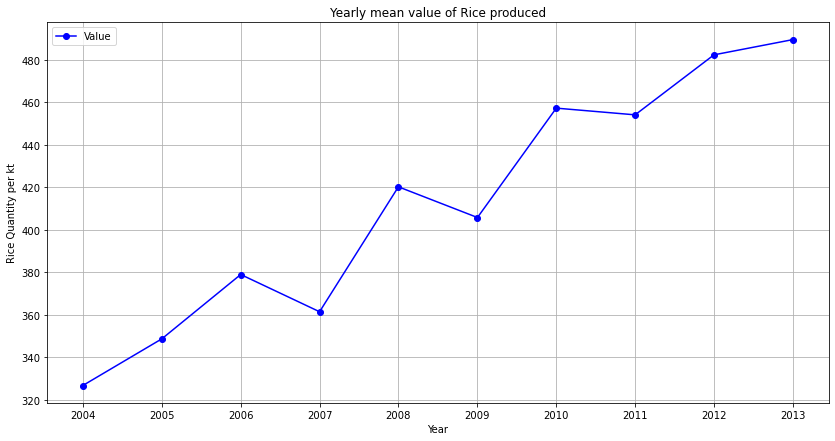

In [10]:
# Average vale of rice produced
fig= plt.figure(figsize=(14, 7))
plt.plot(mv['Year'], mv['Value'], label='Value', marker='o', color='blue')
plt.xlabel('Year')
plt.ylabel('Rice Quantity per kt')
plt.title('Yearly mean value of Rice produced')
plt.grid()
plt.legend()

In [11]:
#creating a new dataframe called country_prod containing the production value for each country using the groupby() method
country_item= pd.DataFrame(food_prod.groupby(['Country','Item'])['Value'].sum()).reset_index(inplace=False) 
country_item

,Country,Item,Value
0,Algeria,Apples and products,3003
1,Algeria,Bananas,0
2,Algeria,Barley and products,12770
3,Algeria,Beans,11
4,Algeria,Beer,1358
...,...,...,...
2307,Zimbabwe,Tea (including mate),197
2308,Zimbabwe,Tomatoes and products,204
2309,Zimbabwe,"Vegetables, Other",1749
2310,Zimbabwe,Wheat and products,996


In [12]:
# grouping by rice item produced per country
item_rice = country_item.loc[country_item.Item== 'Rice (Milled Equivalent)']
item_rice

,Country,Item,Value
48,Algeria,Rice (Milled Equivalent),0
100,Angola,Rice (Milled Equivalent),103
159,Benin,Rice (Milled Equivalent),850
236,Burkina Faso,Rice (Milled Equivalent),1265
332,Cameroon,Rice (Milled Equivalent),767
382,Central African Republic,Rice (Milled Equivalent),261
420,Chad,Rice (Milled Equivalent),1167
471,Congo,Rice (Milled Equivalent),10
532,Cote d'Ivoire,Rice (Milled Equivalent),6439
617,Egypt,Rice (Milled Equivalent),40370


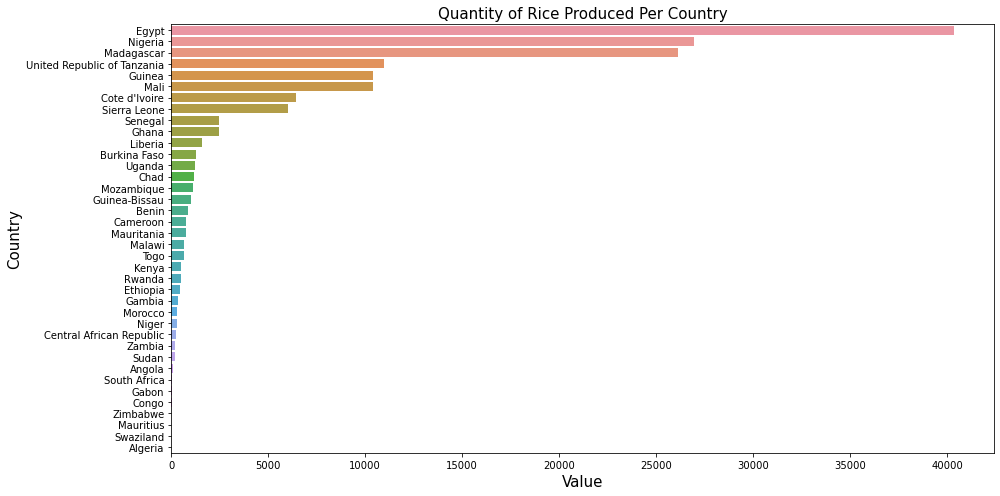

In [13]:
# Quantity of rice produced

plt.figure(figsize=(14,7))
# make barplot and sort bars
sns.barplot(x= item_rice['Value'],
            y= item_rice['Country'], 
            data=item_rice, 
            order=item_rice.sort_values('Value',ascending = False).Country)
# set labels
plt.xlabel("Value", size=15)
plt.ylabel("Country", size=15)
plt.title("Quantity of Rice Produced Per Country", size=15)
plt.tight_layout()
plt.savefig("sort_bars_in_barplot_descending_order_Seaborn_Python.png")

#### Answer: Egypt, Nigeria and Madagasgar

### Question 2: Which one of the following represents the datapoints that lie outside the middle 50% in a sample of numbers

#### Answer: Outliers

### Question 3: Which three countries had the lowest food supply between 2004 and 2006 respectively(inclusive)

In [14]:
food_supply.set_index('Country').groupby("Year")['Value'].nsmallest(4).reset_index()

,Year,Country,Value
0,2004-01-01,Zambia,1866
1,2004-01-01,Ethiopia,1882
2,2004-01-01,Rwanda,1969
3,2004-01-01,Madagascar,1980
4,2005-01-01,Zambia,1873
5,2005-01-01,Ethiopia,1978
6,2005-01-01,Zimbabwe,2025
7,2005-01-01,Central African Republic,2026
8,2006-01-01,Zambia,1838
9,2006-01-01,Ethiopia,1967


In [15]:
fs_2004_to_2006 = food_supply.set_index('Country').groupby("Year")['Value'].nsmallest(4).reset_index().iloc[:12]
fs_2004_to_2006

,Year,Country,Value
0,2004-01-01,Zambia,1866
1,2004-01-01,Ethiopia,1882
2,2004-01-01,Rwanda,1969
3,2004-01-01,Madagascar,1980
4,2005-01-01,Zambia,1873
5,2005-01-01,Ethiopia,1978
6,2005-01-01,Zimbabwe,2025
7,2005-01-01,Central African Republic,2026
8,2006-01-01,Zambia,1838
9,2006-01-01,Ethiopia,1967


In [16]:
# sorting in acending order
item_sorted= fs_2004_to_2006.sort_values('Value', ascending=True)

In [17]:
item_sorted

,Year,Country,Value
8,2006-01-01,Zambia,1838
0,2004-01-01,Zambia,1866
4,2005-01-01,Zambia,1873
1,2004-01-01,Ethiopia,1882
9,2006-01-01,Ethiopia,1967
2,2004-01-01,Rwanda,1969
5,2005-01-01,Ethiopia,1978
3,2004-01-01,Madagascar,1980
10,2006-01-01,Chad,2022
6,2005-01-01,Zimbabwe,2025


### Question 4: Which country produced the hiest amount pf oats in 2010?

In [18]:
#Selecting the Oat Item
oat_2010 = food_prod.loc[food_prod['Item']=='Oats', ['Country','Item','Year','Value']]
oat_2010 = oat_2010.groupby(['Country','Year']).mean().reset_index()
oat_2010

,Country,Year,Value
0,Algeria,2004-01-01,89.0
1,Algeria,2005-01-01,78.0
2,Algeria,2006-01-01,89.0
3,Algeria,2007-01-01,92.0
4,Algeria,2008-01-01,27.0
...,...,...,...
85,Zimbabwe,2009-01-01,1.0
86,Zimbabwe,2010-01-01,1.0
87,Zimbabwe,2011-01-01,1.0
88,Zimbabwe,2012-01-01,1.0


In [19]:
oat_2010.set_index('Country').groupby("Year")['Value'].nlargest(1).reset_index()

,Year,Country,Value
0,2004-01-01,Algeria,89.0
1,2005-01-01,Algeria,78.0
2,2006-01-01,Algeria,89.0
3,2007-01-01,Algeria,92.0
4,2008-01-01,Ethiopia,37.0
5,2009-01-01,Algeria,96.0
6,2010-01-01,Algeria,88.0
7,2011-01-01,Morocco,96.0
8,2012-01-01,Algeria,110.0
9,2013-01-01,Algeria,113.0


In [20]:
oat_2010.set_index('Country').groupby("Year")['Value'].nlargest(1).reset_index().iloc[6]

Year       2010-01-01 00:00:00
Country                Algeria
Value                     88.0
Name: 6, dtype: object

Answer: Algeria

#####Question 4: Because the median is not affectd as much by the presence of extremely large or small numbers, it tends to give a better idea about a dataset than the mean does.

####Answer : True